In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("C:\\Users\\DU3032TU\\Downloads\iris.csv")

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# DEFINING X AND Y
x=df.iloc[:,:5]
y=df.iloc[:,-1]

In [6]:
x.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [7]:
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [8]:
# APPLYING STANDARD SCALAR
from sklearn.preprocessing import StandardScaler 
x=StandardScaler().fit_transform(x)


In [9]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 , random_state=1)

In [10]:
#SVM
from sklearn.svm import SVC
model=SVC(kernel="linear" , random_state=0)
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [11]:
y_pred=model.predict(x_test)

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [13]:
#NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred2=model2.predict(x_test)

In [15]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [16]:
#DECISION TREE 
from sklearn.tree import DecisionTreeClassifier 
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [17]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

In [23]:
#K MEANS CLUSTERING 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)
x=np.array(x)


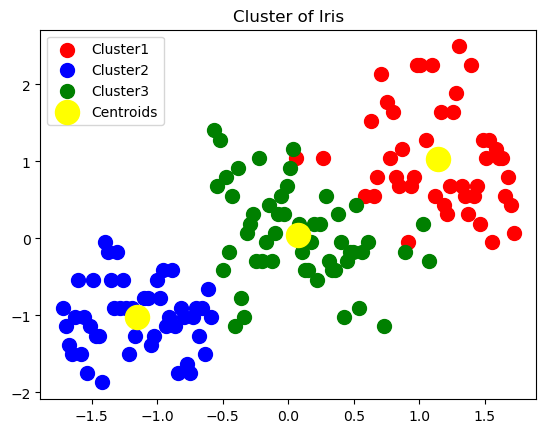

In [25]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans ==0,1], s=100 , c='red' , label='Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans ==1,1], s=100 , c='blue', label='Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans ==2,1], s=100 , c='green', label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Iris')
plt.legend()
plt.show()

In [29]:
#HIERARCHICAL USING AGGLOMERATIVE
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage 

model5=AgglomerativeClustering(linkage="ward",n_clusters=3)

model5.fit(x_train)


AgglomerativeClustering(n_clusters=3)

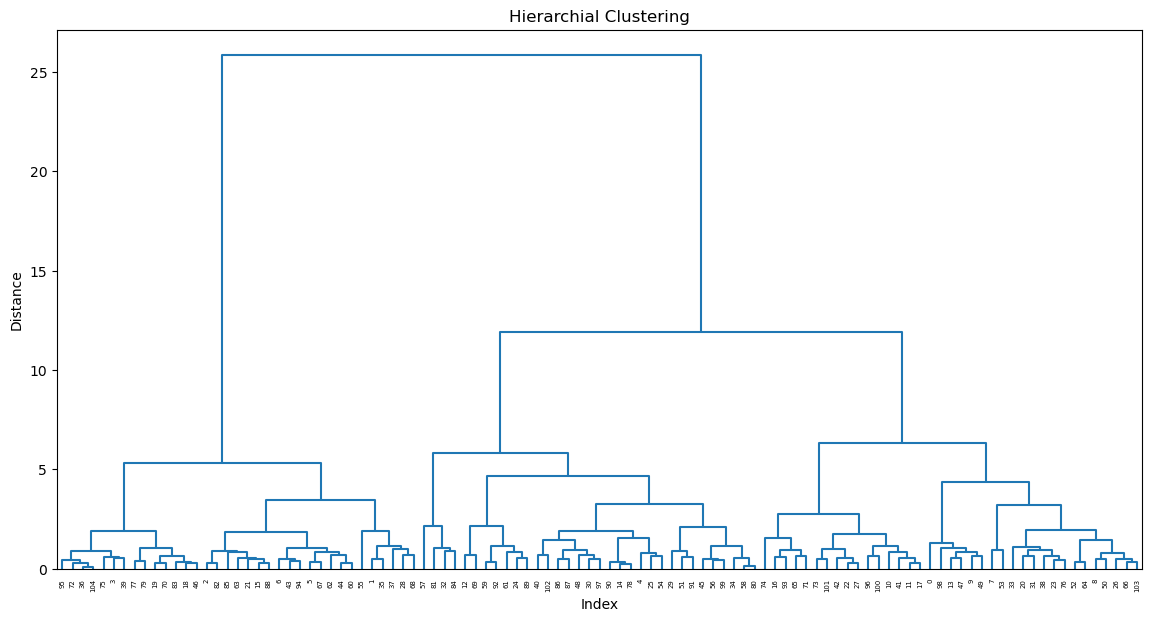

In [30]:
linkage_matrix = linkage(x_train, "ward")
plot = plt.figure(figsize=(14,7))
dendrogram(
    linkage_matrix,
    color_threshold = 0,
)
plt.title("Hierarchial Clustering")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()